#### Examining Factors Responsible for Heart Attacks
Project 3 

DESCRIPTION

Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

Domain: Healthcare

Read the information given below and also refer to the data dictionary provided separately in an excel file to build your understanding.

Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all the information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

1. Preliminary analysis:

Perform preliminary data inspection and report the findings as to the structure of the data, missing values, duplicates, etc.

Based on the findings from the previous question remove duplicates (if any) , treat missing values using an appropriate strategy.

2. Prepare an informative report about the data explaining the distribution of the disease and the related factors. You could use the below approach to achieve the objective

Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools e.g. count plot

Study the occurrence of CVD across Age.

Study the composition of overall patients w.r.t. Gender.

Can we detect a heart attack based on anomalies in the Resting Blood Pressure of the patient?

Describe the relationship between Cholesterol levels and our target variable.

What can be concluded about the relationship between peak exercising and the occurrence of a heart attack.

Is thalassemia a major cause of CVD?

How are the other factors determining the occurrence of CVD?

Use a pair plot to understand the relationship between all the given variables.

3. Build a baseline model to predict using a Logistic Regression and explore the results.

#### Project Task: Week 1

Importing, Understanding, and Inspecting Data :

Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.


#### Importing, Understanding, and Inspecting Data :

#### Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Description = pd.read_excel('variable description.xlsx')
print(Description)

     variable                                        description
0        age                                        age in years
1        sex                              (1 = male; 0 = female)
2         cp                                     chest pain type
3   trestbps    resting blood pressure (in mm Hg on admission...
4       chol                          serum cholestoral in mg/dl
5        fbs    (fasting blood sugar > 120 mg/dl) (1 = true; ...
6    restecg                resting electrocardiographic results
7    thalach                         maximum heart rate achieved
8      exang           exercise induced angina (1 = yes; 0 = no)
9    oldpeak    ST depression induced by exercise relative to...
10     slope           the slope of the peak exercise ST segment
11        ca    number of major vessels (0-3) colored by flou...
12      thal    3 = normal; 6 = fixed defect; 7 = reversable ...
13    target                                              1 or 0


In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [7]:
data.isnull().sum().any()

False

In [8]:
data.duplicated().any()

True

In [9]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
data.drop_duplicates(['age'], keep='first', inplace=True)

In [11]:
data.duplicated().any()

False

#### Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

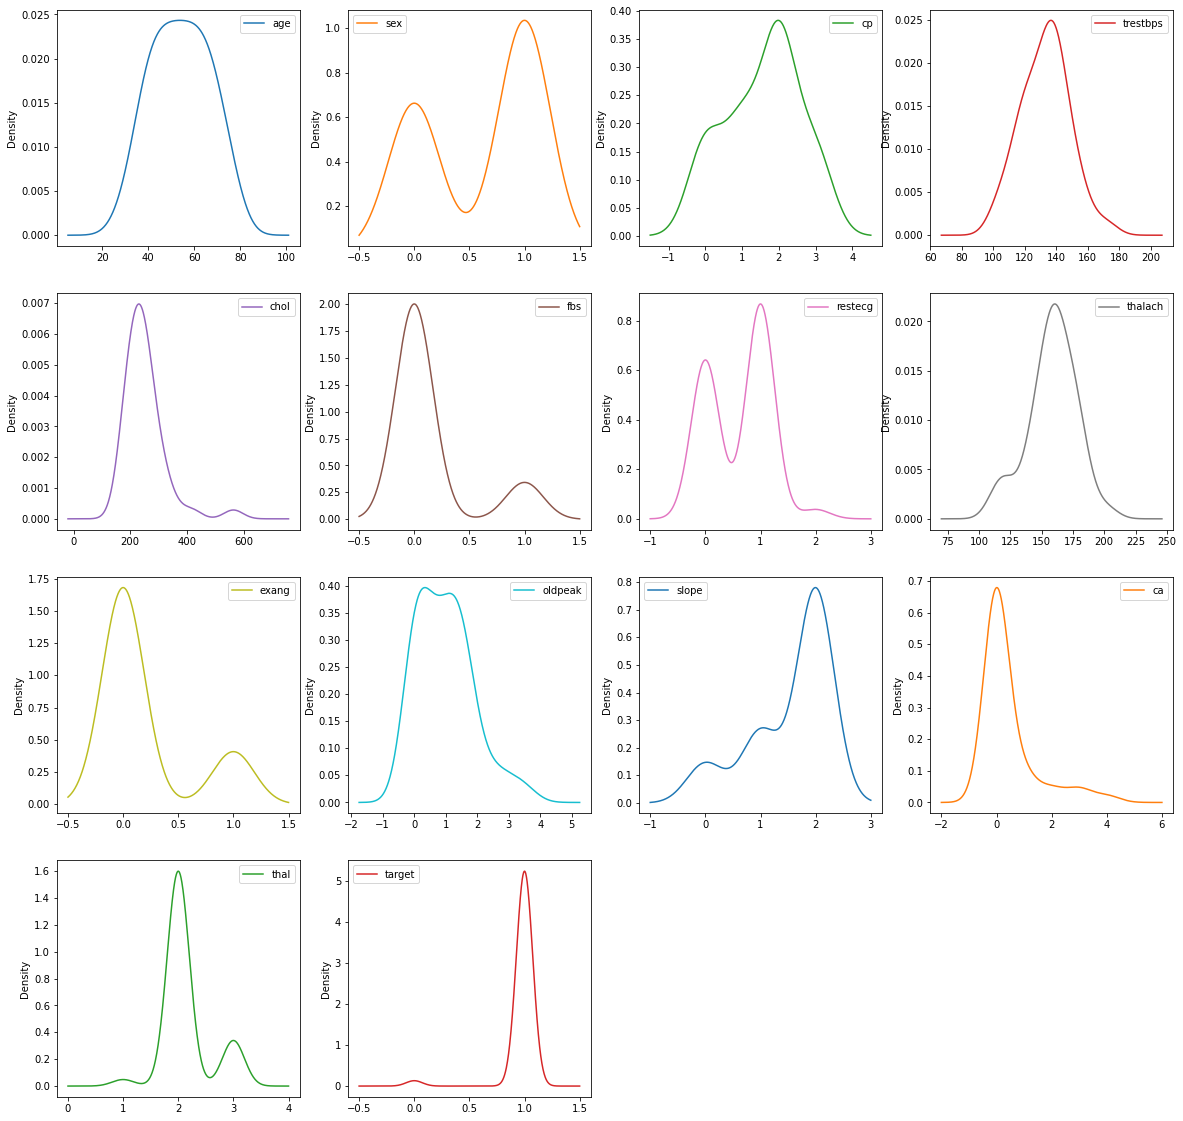

In [12]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,54.024390,0.609756,1.560976,132.951220,251.195122,0.146341,0.609756,158.536585,0.195122,0.980488,1.536585,0.439024,2.146341,0.975610
std,12.618415,0.493865,1.001219,15.159075,71.304705,0.357839,0.542128,19.002760,0.401218,0.879835,0.710548,0.975930,0.421958,0.156174
min,29.000000,0.000000,0.000000,102.000000,175.000000,0.000000,0.000000,114.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,44.000000,0.000000,1.000000,120.000000,204.000000,0.000000,0.000000,150.000000,0.000000,0.200000,1.000000,0.000000,2.000000,1.000000
50%,54.000000,1.000000,2.000000,135.000000,239.000000,0.000000,1.000000,160.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000
75%,64.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,172.000000,0.000000,1.400000,2.000000,0.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,172.000000,564.000000,1.000000,2.000000,202.000000,1.000000,3.500000,2.000000,4.000000,3.000000,1.000000


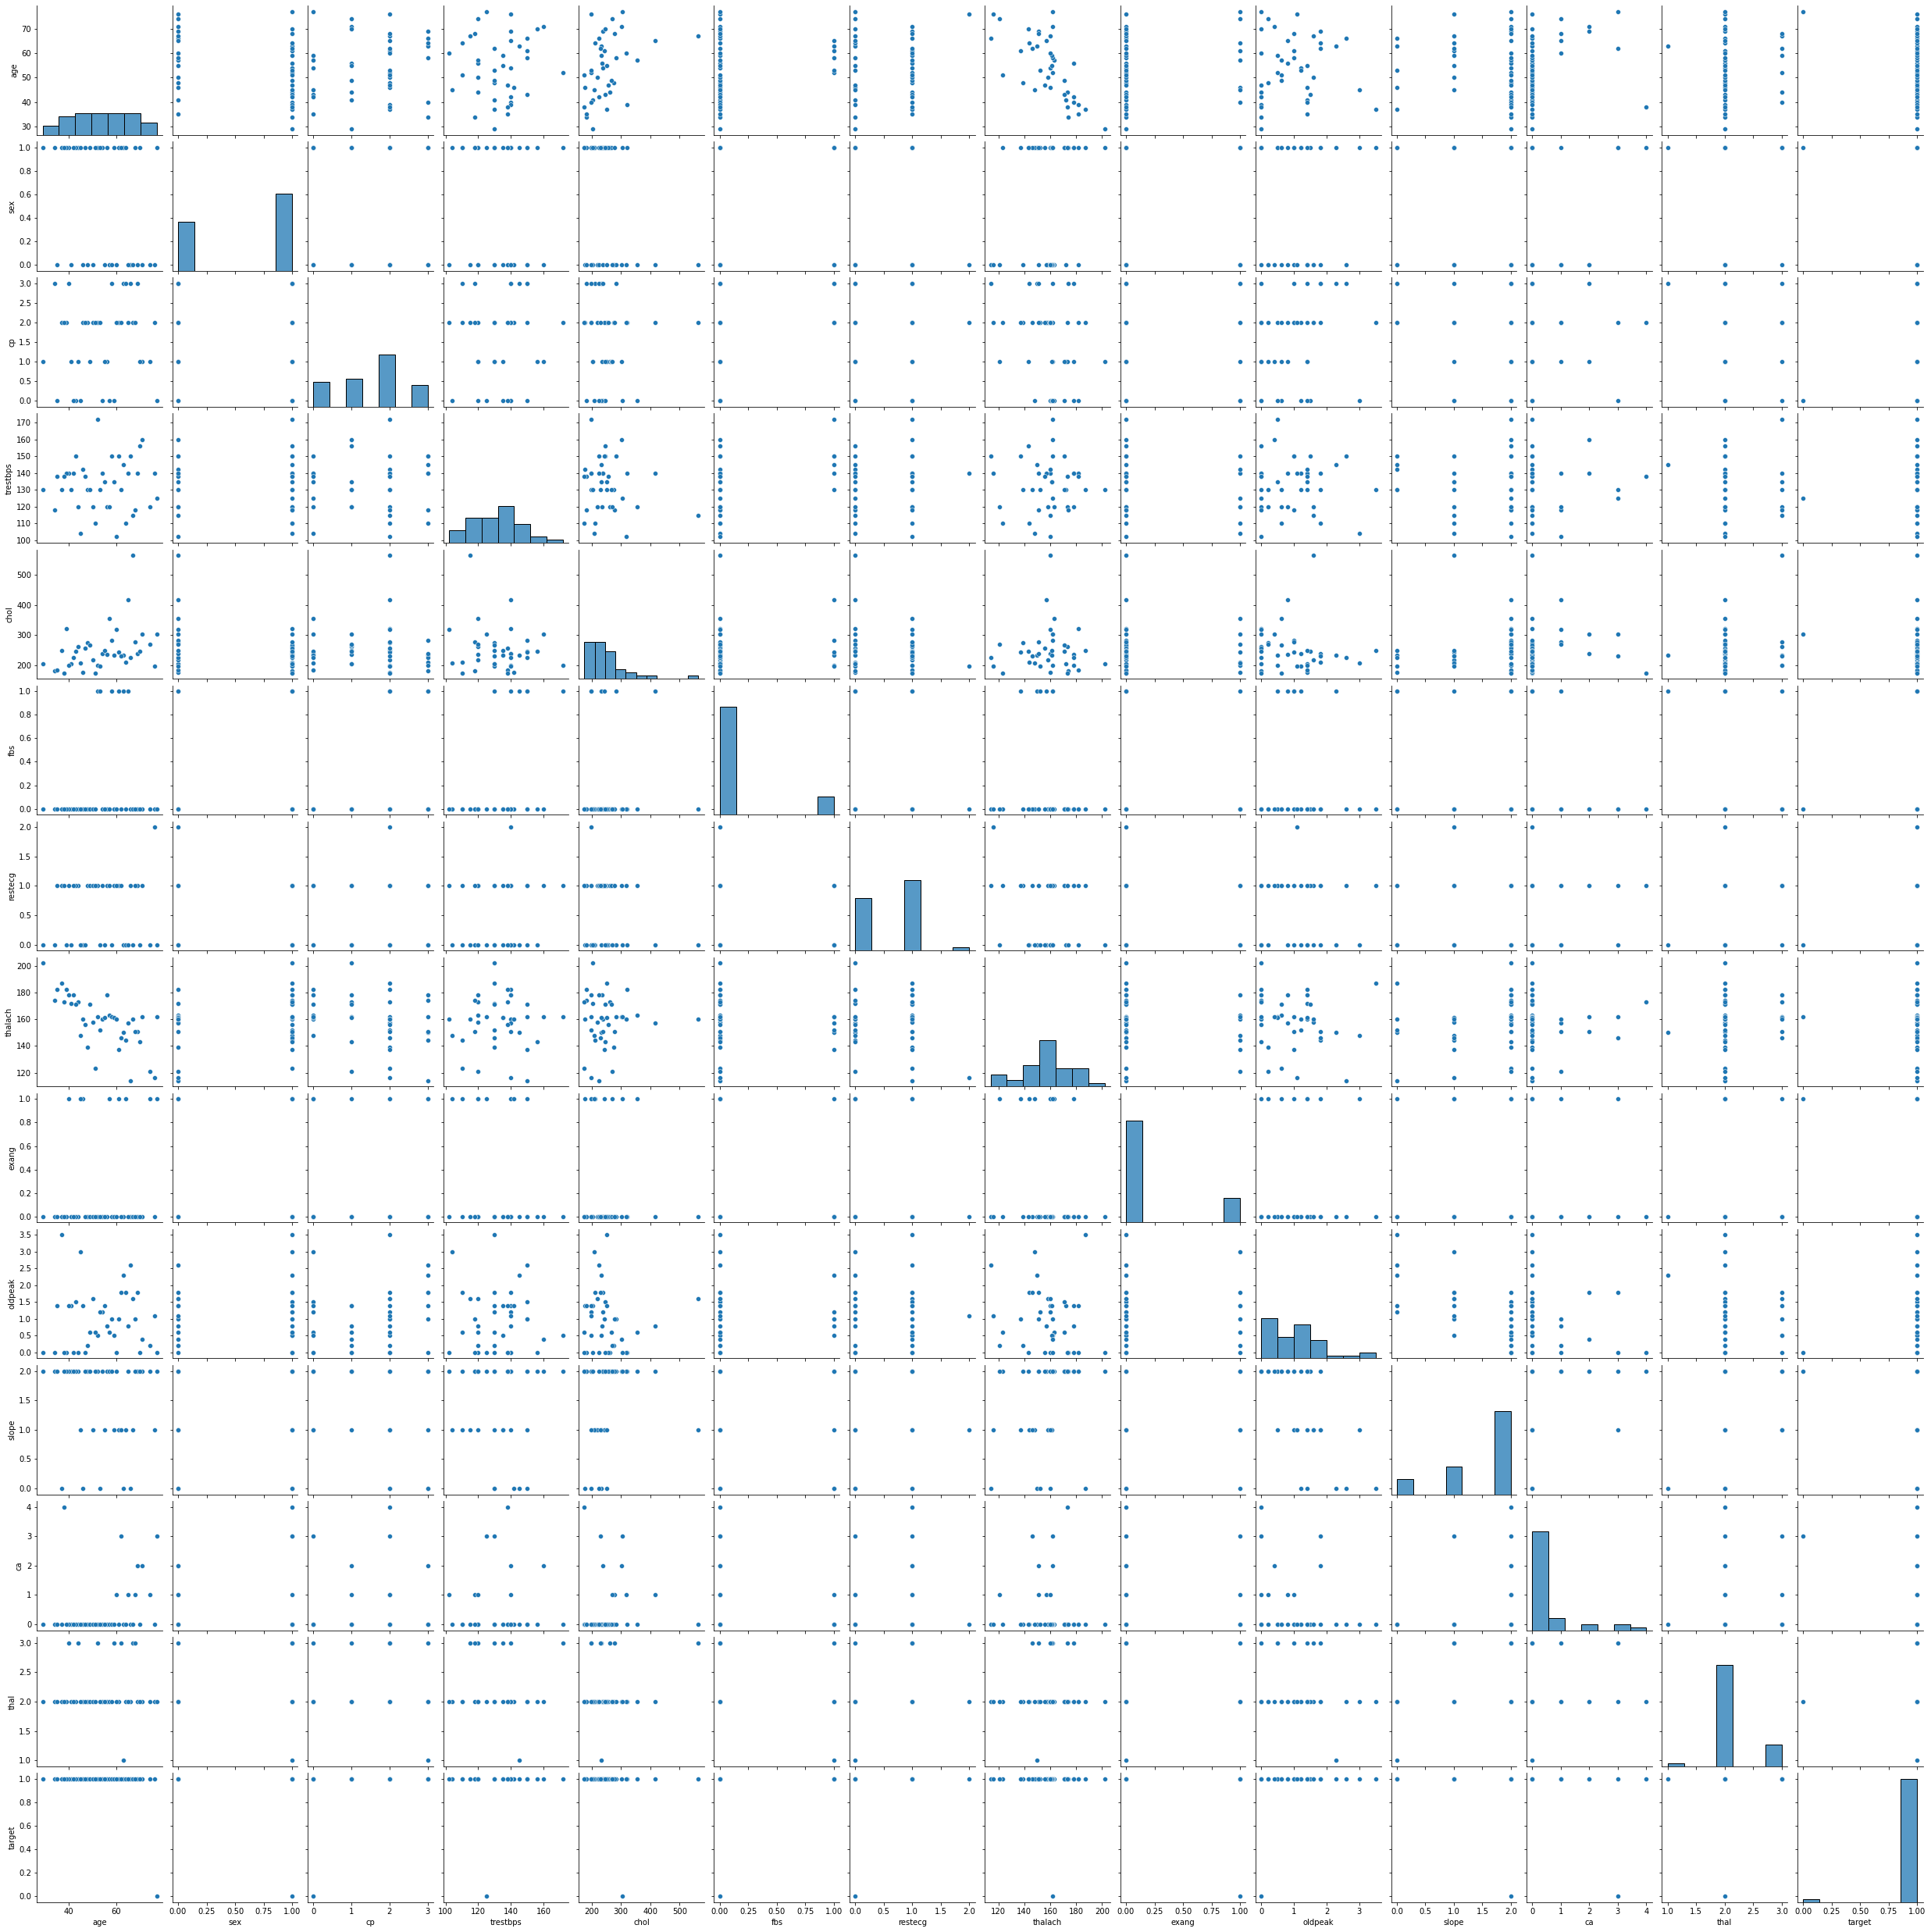

In [14]:
sns.pairplot(data)

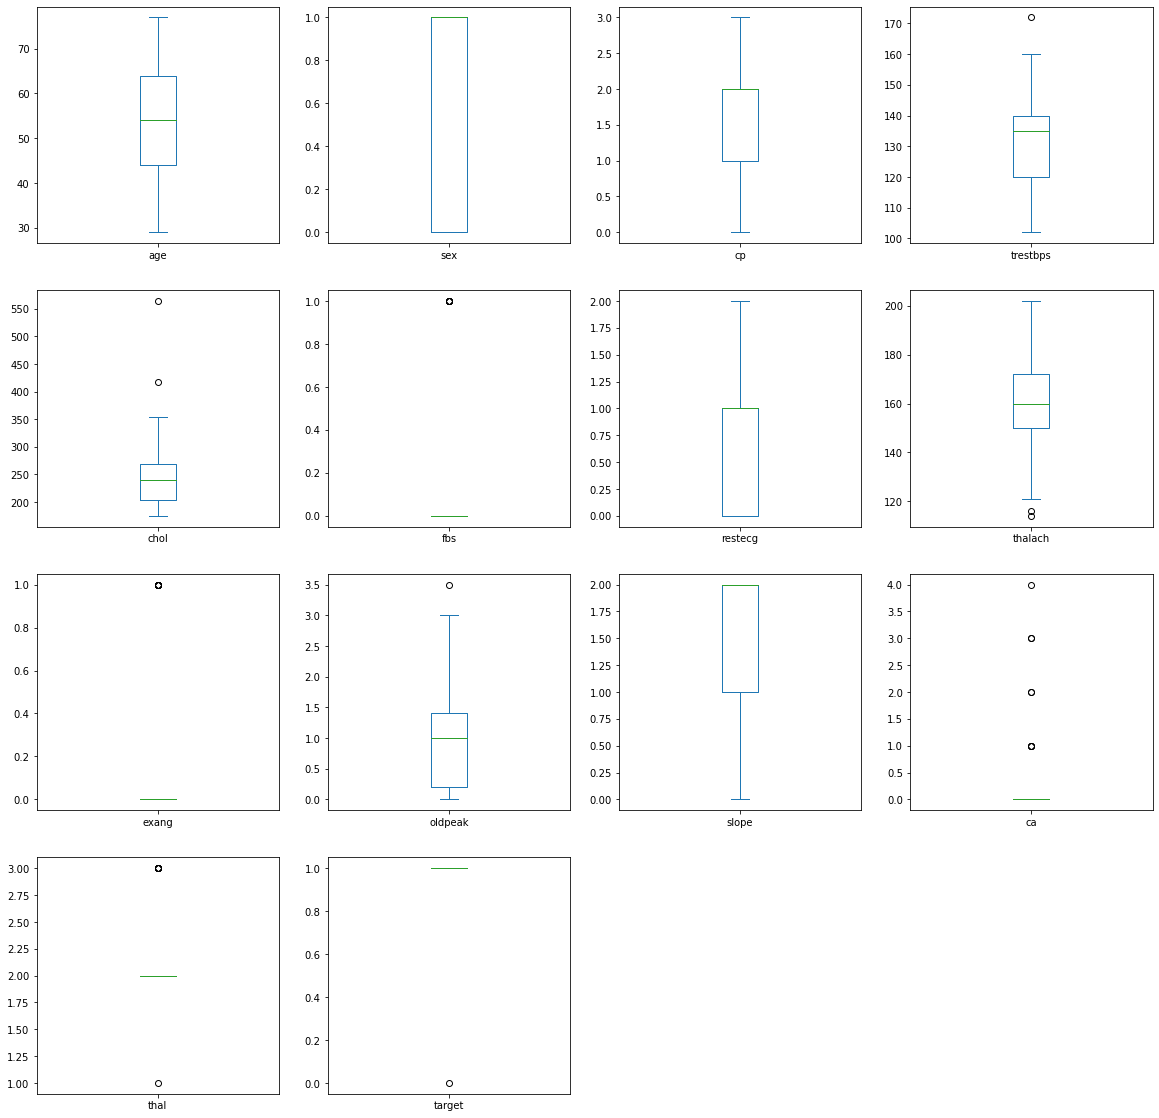

In [15]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

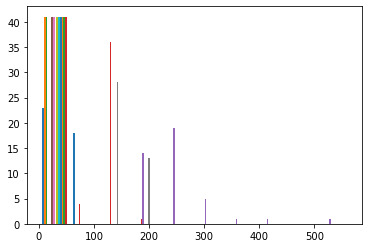

In [16]:
plt.hist(data);

In [17]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

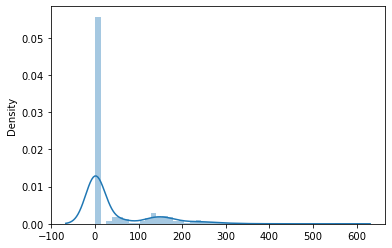

In [18]:
sns.distplot(data)

In [19]:
data.skew()

age        -0.001766
sex        -0.467272
cp         -0.254509
trestbps    0.110403
chol        2.482868
fbs         2.078001
restecg     0.032971
thalach    -0.470243
exang       1.597700
oldpeak     0.866803
slope      -1.233994
ca          2.385096
thal        0.960198
target     -6.403124
dtype: float64

#### Performing EDA:

Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 238
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       41 non-null     int64  
 1   sex       41 non-null     int64  
 2   cp        41 non-null     int64  
 3   trestbps  41 non-null     int64  
 4   chol      41 non-null     int64  
 5   fbs       41 non-null     int64  
 6   restecg   41 non-null     int64  
 7   thalach   41 non-null     int64  
 8   exang     41 non-null     int64  
 9   oldpeak   41 non-null     float64
 10  slope     41 non-null     int64  
 11  ca        41 non-null     int64  
 12  thal      41 non-null     int64  
 13  target    41 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 5.9 KB


In [21]:
data.nunique() < 5

age         False
sex          True
cp           True
trestbps    False
chol        False
fbs          True
restecg      True
thalach     False
exang        True
oldpeak     False
slope        True
ca          False
thal         True
target       True
dtype: bool

#### sex, cp, fbs, restecg, exang, slope, thal, target are categorical variables

<AxesSubplot:ylabel='Density'>

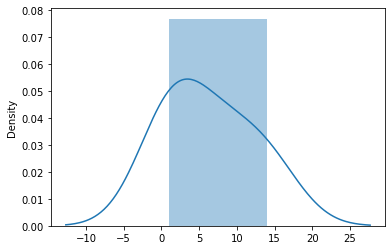

In [22]:
sns.distplot((data.nunique() < 5).describe())

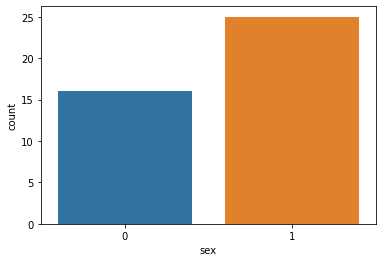

In [23]:
sns.countplot(x ='sex', data = data)
plt.show()

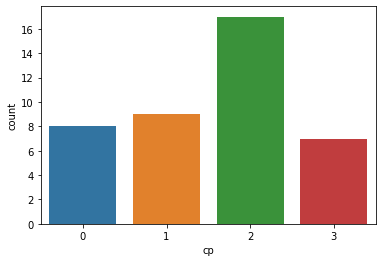

In [24]:
sns.countplot(x ='cp', data = data)
plt.show()

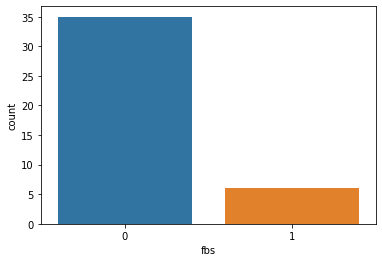

In [25]:
sns.countplot(x ='fbs',data = data)
plt.show()

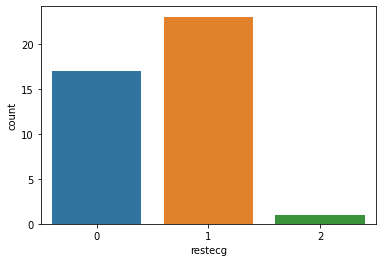

In [26]:
sns.countplot(x ='restecg', data = data)
plt.show()

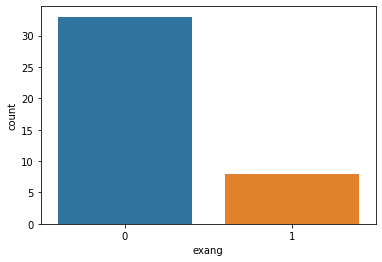

In [27]:
sns.countplot(x ='exang', data = data)
plt.show()

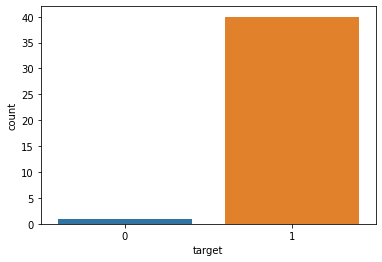

In [28]:
sns.countplot(x='target', data=data)
plt.show()

#### Study the occurrence of CVD across different ages.

In [29]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
data['age'].values

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

In [31]:
data['age'].value_counts()

63    1
51    1
53    1
46    1
45    1
39    1
47    1
62    1
34    1
35    1
29    1
55    1
60    1
67    1
68    1
74    1
76    1
70    1
38    1
65    1
71    1
37    1
40    1
41    1
56    1
57    1
44    1
52    1
54    1
48    1
49    1
64    1
58    1
50    1
66    1
43    1
69    1
59    1
42    1
61    1
77    1
Name: age, dtype: int64

In [32]:
data['age'].sort_values(ascending=False)

238    77
144    76
129    74
25     71
145    70
19     69
86     68
85     67
17     66
28     65
13     64
0      63
52     62
23     61
82     60
20     59
14     58
4      57
3      56
75     55
10     54
29     53
8      52
27     51
15     50
12     49
11     48
47     47
35     46
42     45
7      44
18     43
22     42
2      41
24     40
44     39
163    38
1      37
65     35
58     34
72     29
Name: age, dtype: int64

In [33]:
data['age'].nunique()

41

In [34]:
data['age'].describe().plot

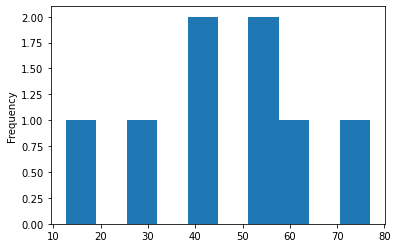

In [35]:
data['age'].describe().plot(kind='hist');

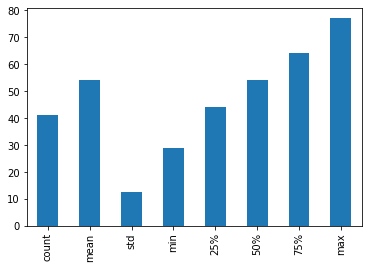

In [36]:
data['age'].describe().plot(kind='bar');

<AxesSubplot:xlabel='age', ylabel='Density'>

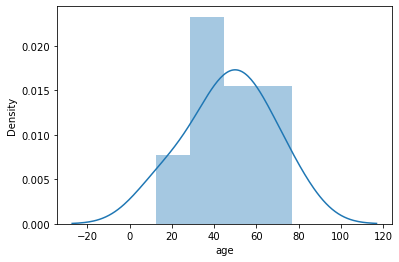

In [37]:
sns.distplot(data['age'].describe())

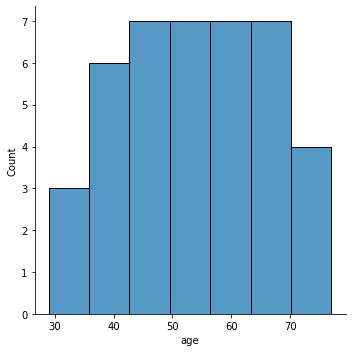

In [38]:
sns.displot(data['age'])

<AxesSubplot:ylabel='Density'>

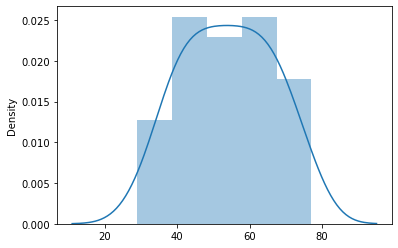

In [39]:
sns.distplot(data['age'].values)

In [40]:
data['target'].value_counts()

1    40
0     1
Name: target, dtype: int64

### Can we detect heart attack based on anomalies in resting blood pressure of the patient?

<AxesSubplot:>

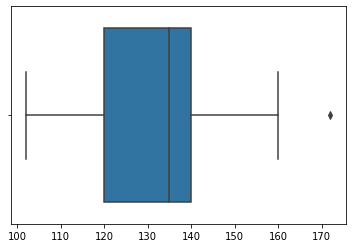

In [41]:
sns.boxplot(data['trestbps'].values)

In [42]:
data[data['trestbps']>160]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


### Yes,we can detect heart attack based on anomalies in resting blood pressure of the patient

### Study the composition of overall patients w.r.t . gender.

#### 1 = male; 0 = female

<AxesSubplot:ylabel='count'>

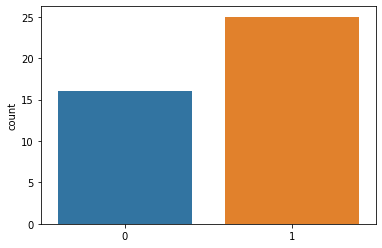

In [43]:
sns.countplot(data['sex'].values)

In [44]:
data['sex'].value_counts()

1    25
0    16
Name: sex, dtype: int64

#### males are larger in number as compared to females

#### Project Task: Week 2

Performing EDA and Modeling:

#### Describe the relationship between cholesterol levels and our target variable.

In [45]:
data[['chol','target']].corr()

,chol,target
chol,1.000000,-0.118546
target,-0.118546,1.000000


<AxesSubplot:xlabel='chol', ylabel='target'>

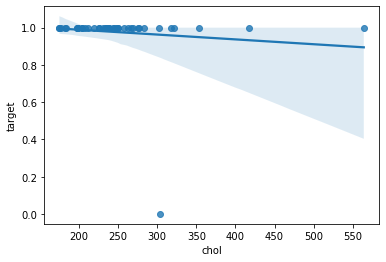

In [46]:
sns.regplot(x=data.chol,y=data.target)

#### Negatively correlated

### What can be concluded about the relationship between peak exercising and occurrence of heart attack?

In [47]:
data[['exang','target']].corr()

,exang,target
exang,1.000000,-0.321131
target,-0.321131,1.000000


<AxesSubplot:xlabel='exang', ylabel='target'>

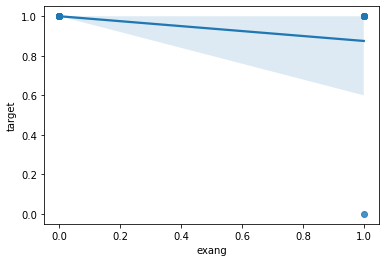

In [48]:
sns.regplot(x=data.exang,y=data.target)

<AxesSubplot:>

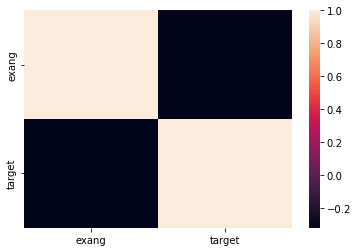

In [49]:
sns.heatmap(data[['exang','target']].corr())

#### negatively correlated

#### Is thalassemia a major cause of CVD? 

In [50]:
data[['thal','target']].corr()

,thal,target
thal,1.000000,0.055517
target,0.055517,1.000000


<AxesSubplot:xlabel='thal', ylabel='target'>

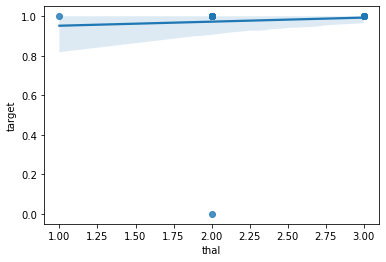

In [51]:
sns.regplot(x=data.thal,y=data.target)

#### How are the other factors determining the occurrence of CVD?

<AxesSubplot:>

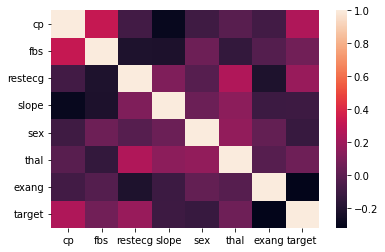

In [52]:
sns.heatmap(data[['cp','fbs','restecg','slope','sex','thal','exang','target']].corr())

<AxesSubplot:>

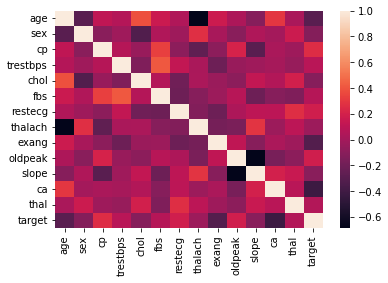

In [53]:
sns.heatmap(data.corr()) 

#### Use a pair plot to understand the relationship between all the given variables.

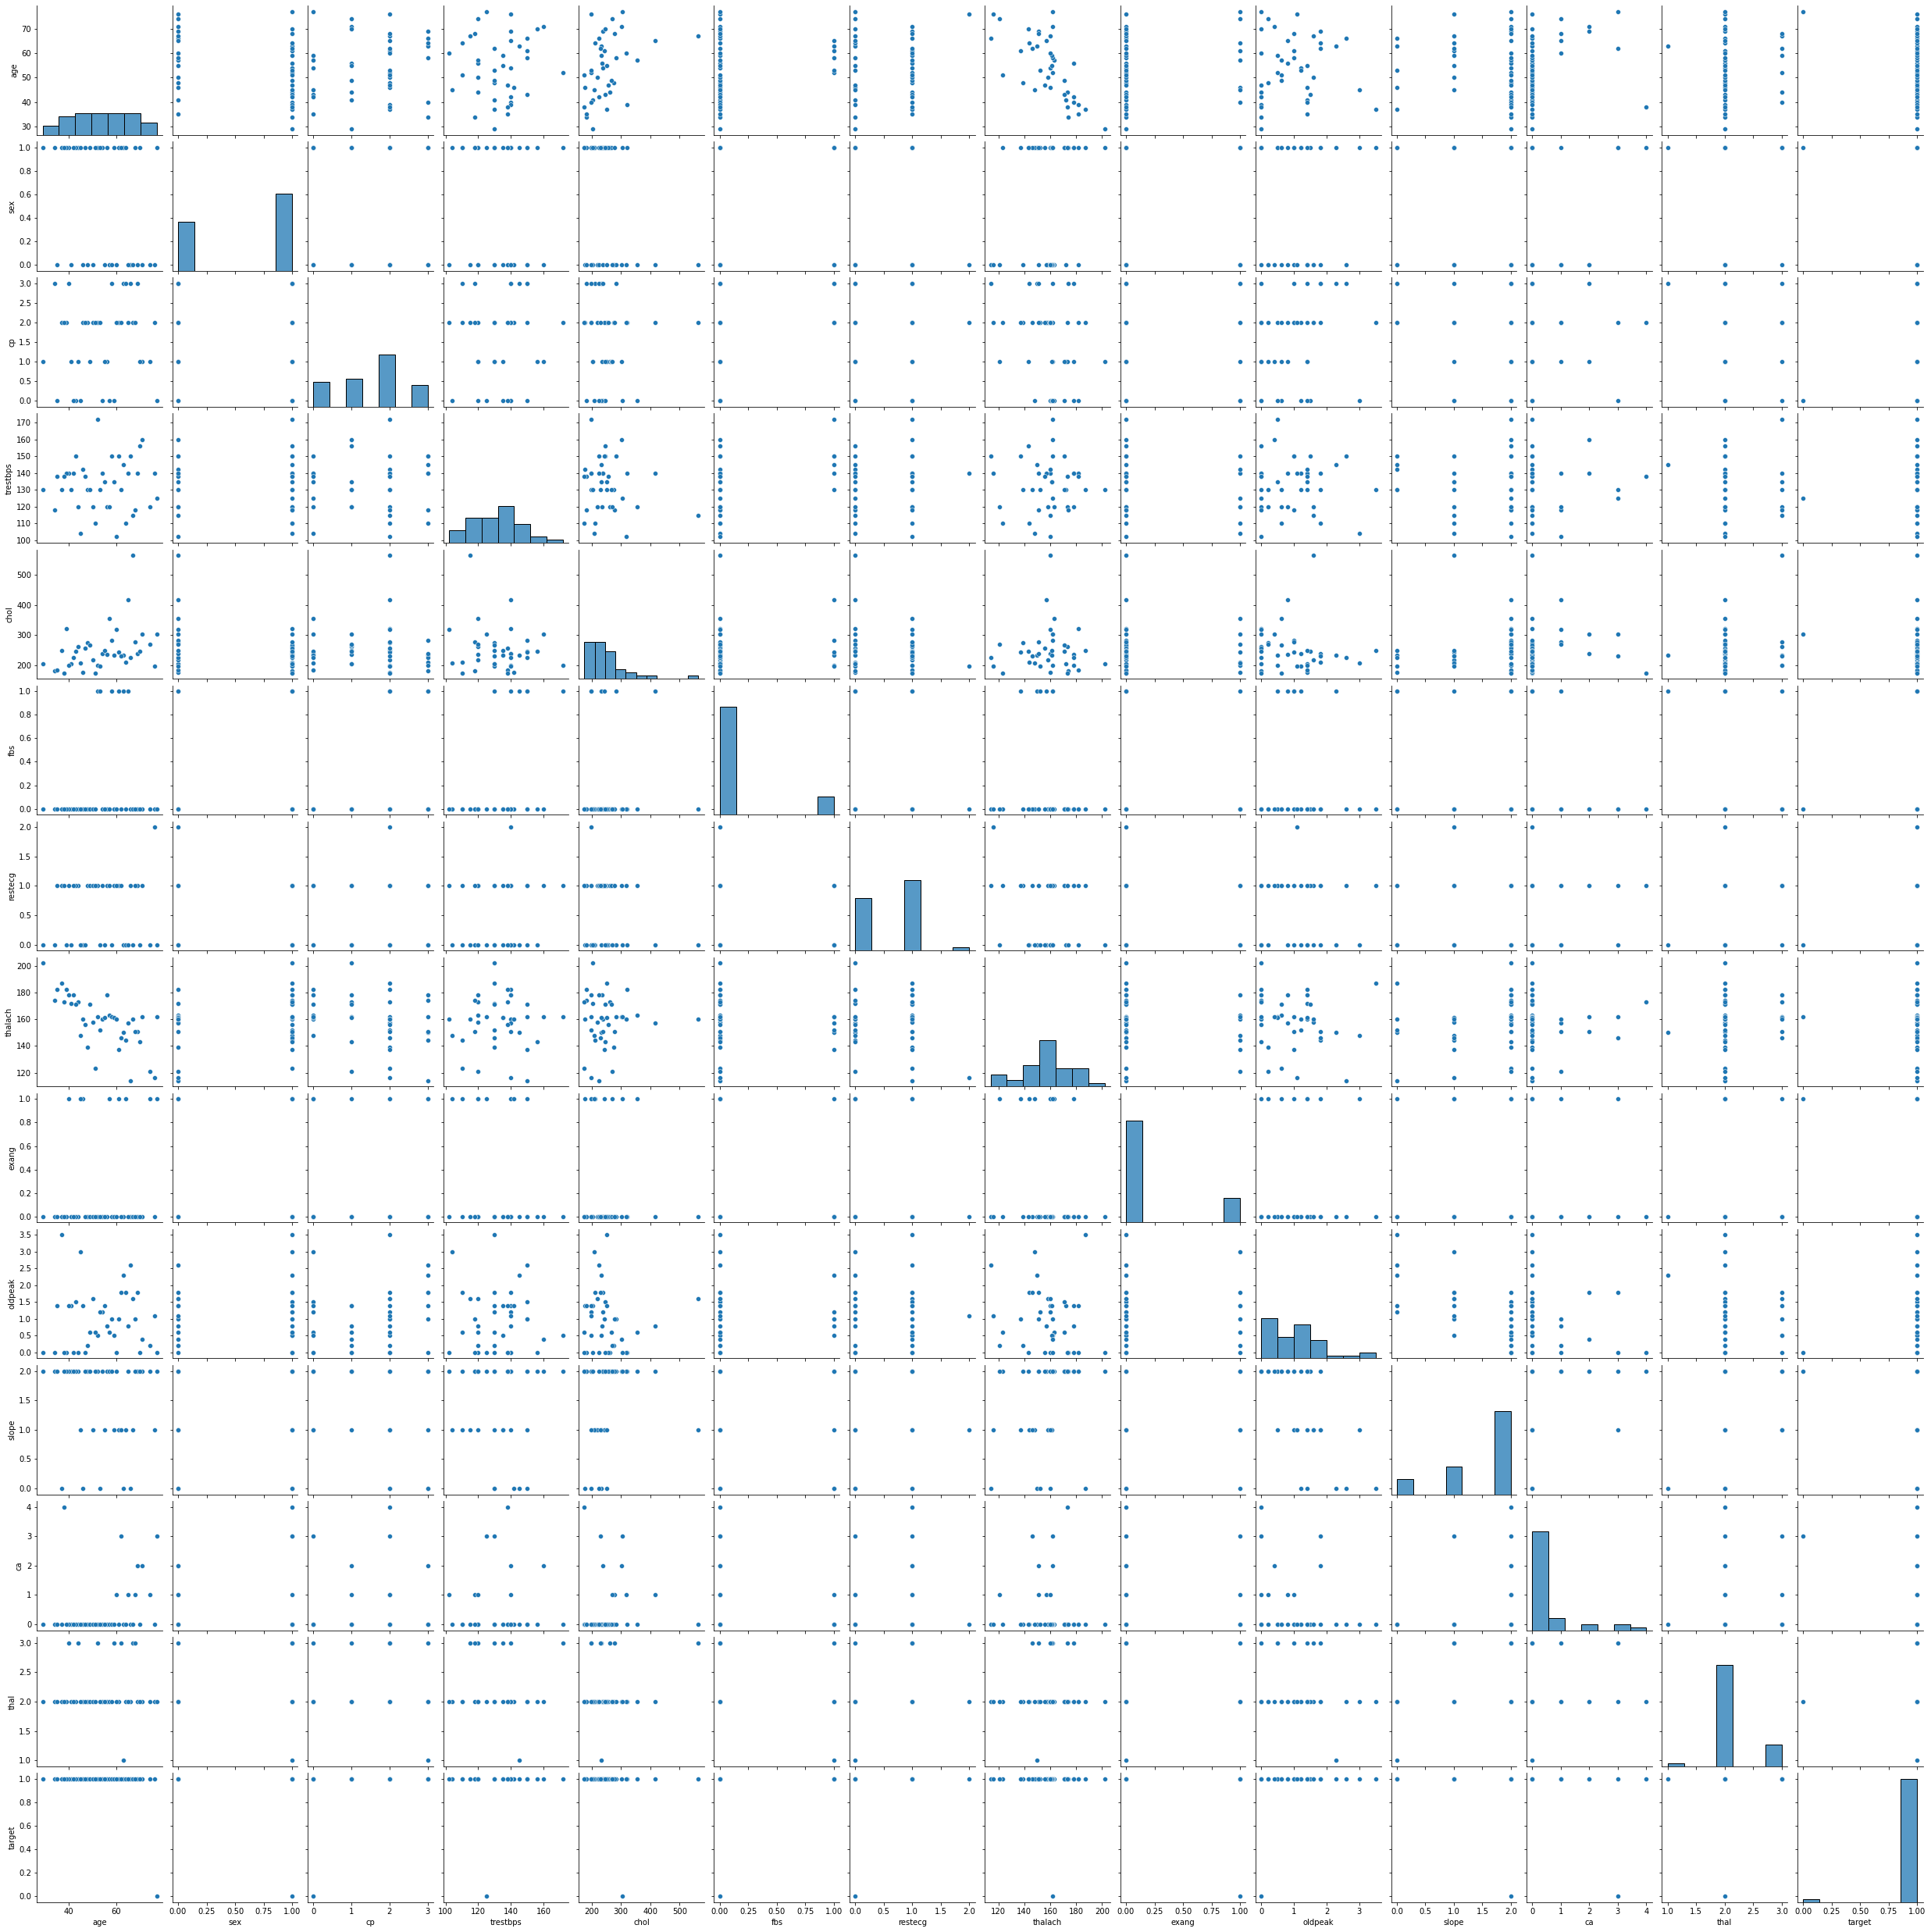

In [54]:
sns.pairplot(data)

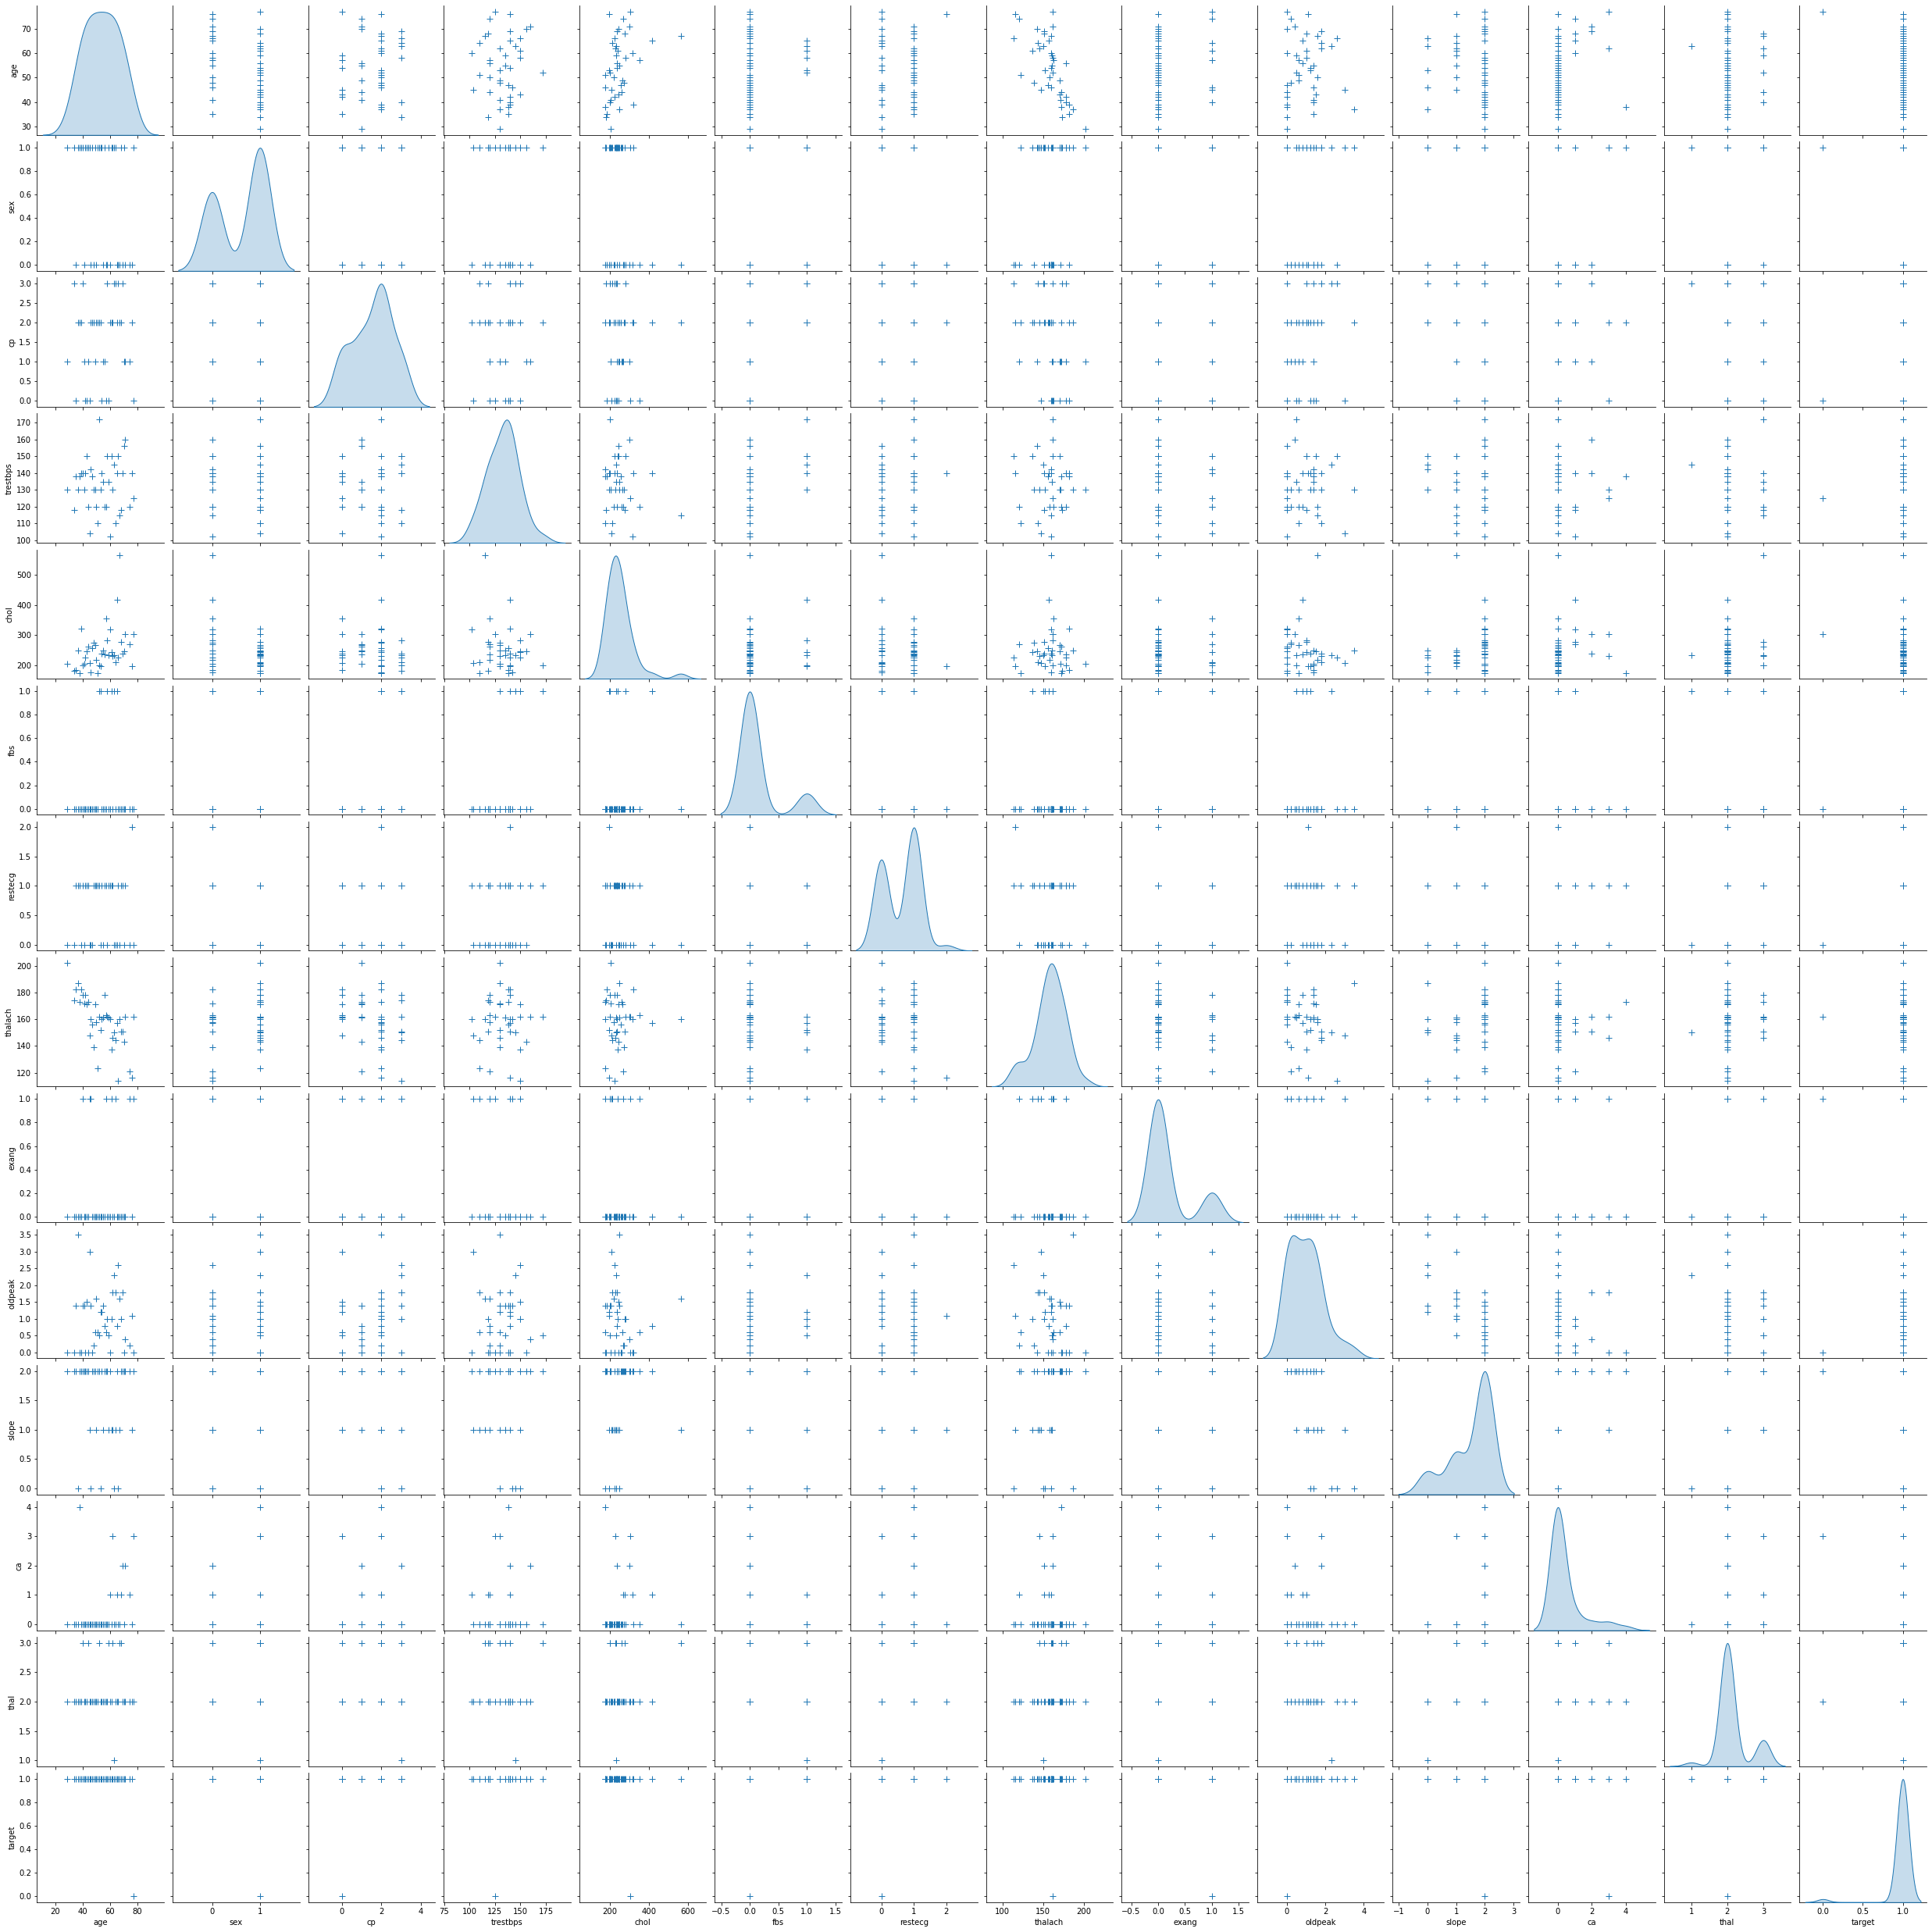

In [55]:
g = sns.pairplot(data, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True))

#### Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

In [56]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Spliting data into x and y

In [57]:
X = data.loc[:, data.columns != 'target' ] # independent variable

y = data.loc[:, data.columns == 'target'] #target variable

In [58]:
X = pd.get_dummies(X, drop_first=True)

In [59]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [60]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


Train-Test split

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12)

In [63]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [64]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3


In [65]:
X_train.shape,X_test.shape

((28, 13), (13, 13))

In [66]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [69]:
confusion_matrix

array([[ 0,  0],
       [ 1, 12]])

<AxesSubplot:>

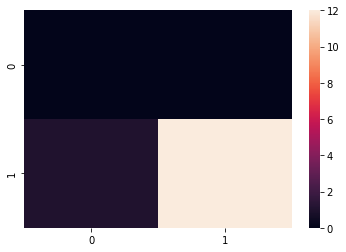

In [70]:
sns.heatmap(confusion_matrix)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.92      0.96        13

    accuracy                           0.92        13
   macro avg       0.50      0.46      0.48        13
weighted avg       1.00      0.92      0.96        13



#### Dashboarding:

Visualize the variables using Tableau to create an understanding for attributes of a Diseased vs. a Healthy person.

Demonstrate  the variables associated with each other and factors to build a dashboard



In [72]:
data.to_excel('exdata.xlsx')

#### https://public.tableau.com/app/profile/rushikesh.khankar/viz/ExaminingFactorsResponibleForHeartAttacks2/Dashboard2?publish=yes

### https://public.tableau.com/app/profile/rushikesh.khankar/viz/ExaminingFactorsResponibleForHeartAttacks/Dashboard1?publish=yes